In [ ]:
#Name:Shricharan
#Register Number - 125013036
#Date-05/03/2024
#BIN2023R01 - INTRODUCTION TO DATAMINING & MACHINE LEARNING FOR BIOINFORMATICS
#Exercise7
#Version - 1.0

In [ ]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


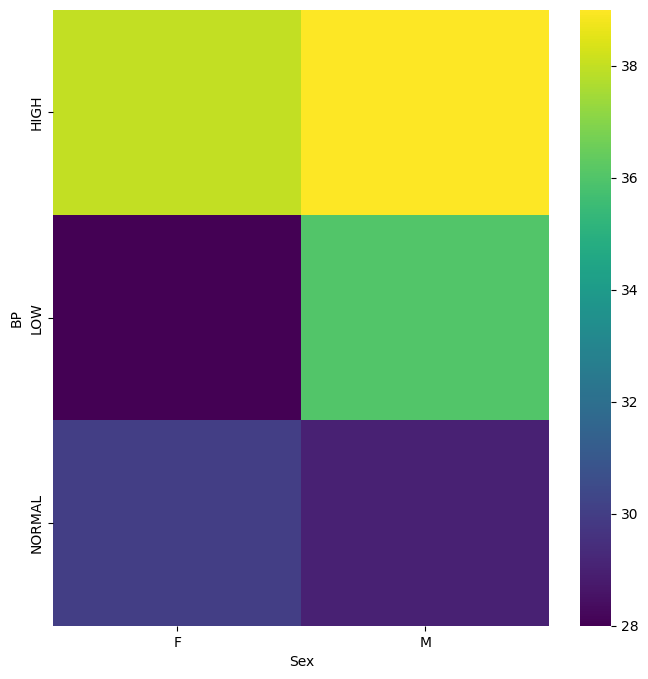

In [ ]:
# @title Sex vs BP

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['BP'].value_counts()
    for x_label, grp in data.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('BP')

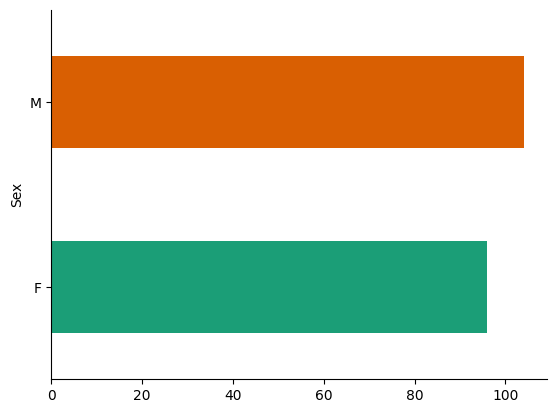

In [ ]:
# @title Sex

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd
data = pd.read_csv("drug200.csv")
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)

In [ ]:
data.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["BP"] = le.fit_transform(data["BP"])
data["Cholesterol"] = le.fit_transform(data["Cholesterol"])
data["Drug"] = le.fit_transform(data["Drug"])
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [ ]:
data=data.select_dtypes(include='number')
from scipy import stats
z_scores_combined = np.abs(stats.zscore(data))

threshold = 3
df = data[(z_scores_combined < threshold).all(axis=1)]
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [ ]:
from sklearn.preprocessing import StandardScaler
df_dependant = df.pop("Drug")
df_selected= df.drop("Sex",axis=1)
scaler_standadization = StandardScaler()
df_standardized = scaler_standadization.fit_transform(df_selected)
df_standardized

array([[-1.28642592e+00, -1.10687320e+00, -9.75182235e-01,
         1.33073157e+00],
       [ 1.66736377e-01,  1.10075788e-01, -9.75182235e-01,
        -4.08517154e-01],
       [ 1.66736377e-01,  1.10075788e-01, -9.75182235e-01,
        -8.31060127e-01],
       [-9.83683774e-01,  1.32702478e+00, -9.75182235e-01,
        -1.15956282e+00],
       [ 1.01441438e+00,  1.10075788e-01, -9.75182235e-01,
         2.93593528e-01],
       [-1.34697435e+00,  1.32702478e+00, -9.75182235e-01,
        -1.04481382e+00],
       [ 2.87833236e-01,  1.32702478e+00, -9.75182235e-01,
         4.28194499e-02],
       [-1.96554197e-01,  1.10075788e-01, -9.75182235e-01,
        -7.00141307e-01],
       [ 9.53865955e-01,  1.32702478e+00, -9.75182235e-01,
        -1.13772508e-01],
       [-7.54573387e-02,  1.10075788e-01,  1.02544936e+00,
         4.81532245e-01],
       [ 1.66736377e-01,  1.10075788e-01, -9.75182235e-01,
        -5.96597712e-01],
       [-6.20393200e-01, -1.10687320e+00,  1.02544936e+00,
      

In [ ]:
x = df_selected.to_numpy()
y = df_dependant.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("x train shape:", x_train.shape)
print("x test shape:", x_test.shape)
print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)

x train shape: (159, 4)
x test shape: (40, 4)
y train shape: (159,)
y test shape: (40,)


[Text(0.625, 0.9, 'x[3] <= 14.829\ngini = 0.688\nsamples = 159\nvalue = [18, 14, 10, 44, 73]'),
 Text(0.5, 0.7, 'x[1] <= 0.5\ngini = 0.654\nsamples = 86\nvalue = [18, 14, 10, 44, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.492\nsamples = 32\nvalue = [18, 14, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 14\nvalue = [0, 14, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[1] <= 1.5\ngini = 0.302\nsamples = 54\nvalue = [0, 0, 10, 44, 0]'),
 Text(0.625, 0.3, 'x[2] <= 0.5\ngini = 0.48\nsamples = 25\nvalue = [0, 0, 10, 15, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 0, 29, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 73\nvalue = [0, 0, 0, 0, 73]')]

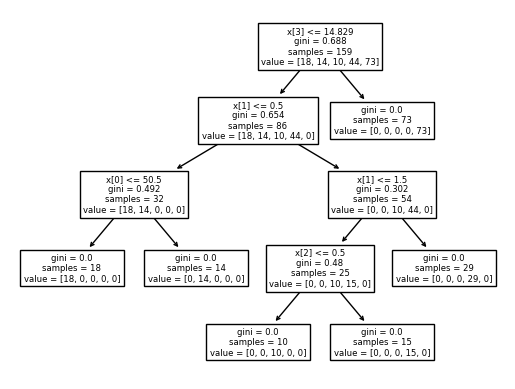

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import joblib

c= DecisionTreeClassifier()
c.fit(x_train, y_train)
tree.plot_tree(c)

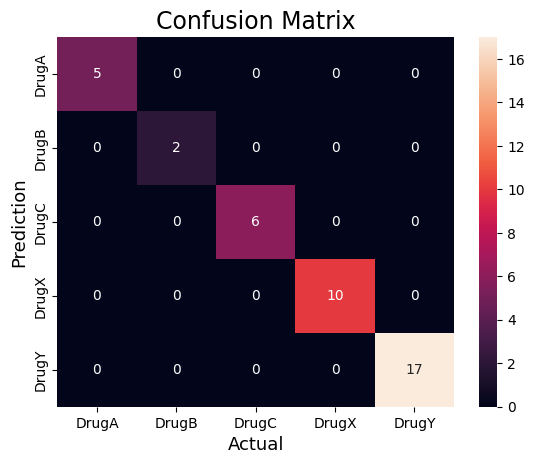

Predicted drug for new data: 3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
y_pred = c.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=["DrugA","DrugB","DrugC","DrugX","DrugY"],
            yticklabels=["DrugA","DrugB","DrugC","DrugX","DrugY"])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
joblib.dump(c, 'decision_tree_model.pkl')
l = joblib.load('decision_tree_model.pkl')
new_data = pd.DataFrame({'Age': [80], 'Na_to_K': [9.445], 'BP':[1], 'Cholesterol_NORMAL': [0]})
predict = l.predict(new_data)
print(f'Predicted drug for new data: {predict[0]}')